문제정의: 환자 정보를 사용하여 심장 질환 유무(정상 :0, 심장 질환 진단: 1)를 분류하는 이중 분류 문제로 정의

데이터 다운로드: https://archive.ics.uci.edu/ml/datasets/heart+disease

라이브러리 임포트

In [ ]:
# Libraries for reading and handling the data
import numpy
import pandas

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

데이터 준비하기

In [ ]:
df = pandas.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


데이터 살펴보기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# null 값 확인
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

데이터 전처리

In [ ]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
df[categorical_var] = df[categorical_var].astype('category')

# 카테고리로 바꾸는 이유?: 예를 들어 sex가 1 or 0이라면, 이것이 숫자가 아닌 어떤 의미를 가진 것인지, 여성인지 남성인지 알기 위해

In [ ]:
df.info()
# ↓ category형으로 바뀐 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


데이터 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



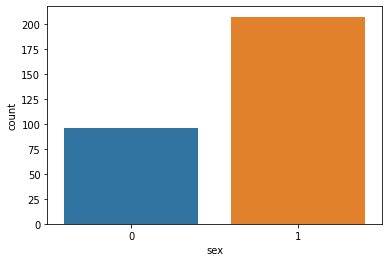

In [ ]:
# 성별에 따른 환자의 수 (0: 여성, 1: 남성)
seaborn.countplot(df.sex)

In [ ]:
df.groupby('cp').sum().reset_index()[['cp', 'output']]
# cp로 그룹 짓고(groupby)하고 더한 후(sum), cp랑 output를 인덱스로 묶어서 확인해보기 
# cp(chest pain)의 종류가 4개

,cp,output
0,0,39
1,1,41
2,2,69
3,3,16


In [ ]:
# 환자의 가슴 통증 타입 별 환자 수  ...cp: chest pain type
px.bar(df.groupby('cp').sum().reset_index()[['cp', 'output']],
       x = 'cp', y = 'output', color = 'cp' ,
       title = 'Count plot of Heart Disease with Respect to Chest Pain')

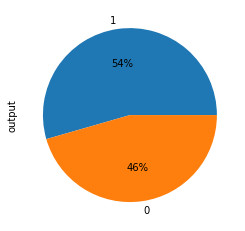

In [ ]:
# 정상-심장병 환자 비율 (0: 정상, 1: 심장병)
df.output.value_counts().plot.pie(autopct = '%1.f%%')

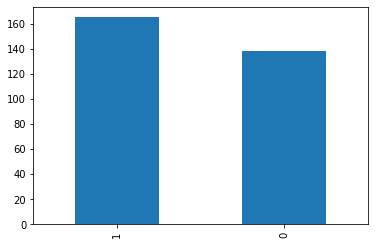

In [ ]:
df.output.value_counts().plot.bar()

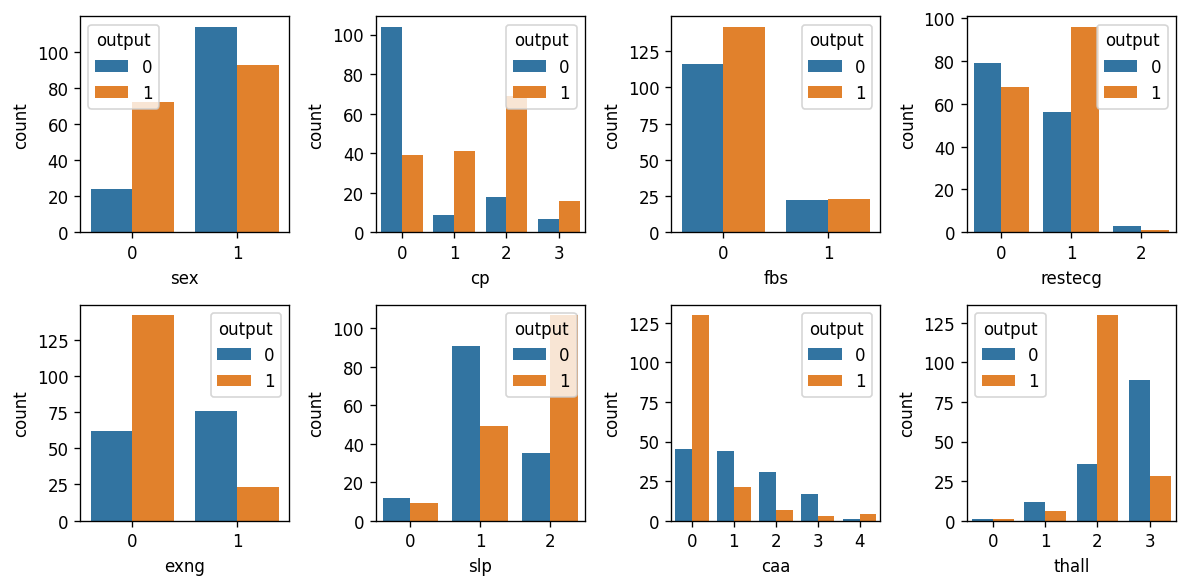

In [ ]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
#                      2줄에 4개씩 그려라
fig, ax = plt.subplots(2, 4, figsize = (10, 5), dpi = 120)

for axis, cat_var in zip(ax.ravel(), categorical_var):
  seaborn.countplot(x = cat_var, data = df, hue = 'output', ax = axis)

plt.tight_layout()

In [ ]:
# 수치형으로 되어 있는 컬럼 -> 이상치
numberic_var = [i for i in df.columns if i not in categorical_var][:-1]

In [ ]:
numberic_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

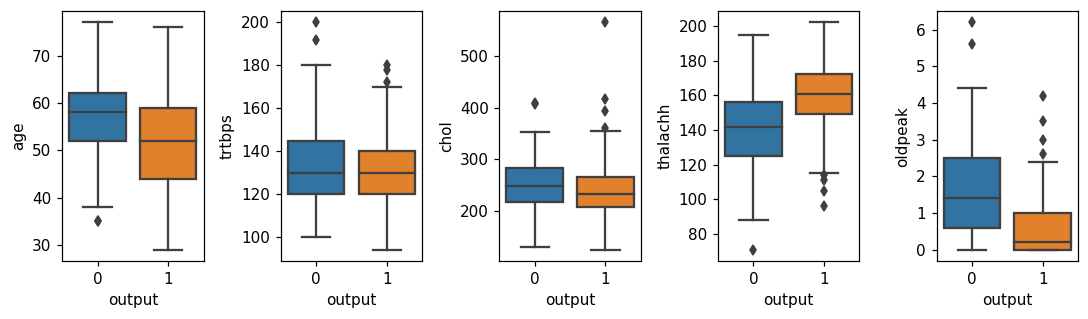

In [ ]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
fig, ax = plt.subplots(1, 5, figsize = (10, 3), dpi = 110)

for axis, num_var in zip(ax.ravel(), numberic_var):
  seaborn.boxplot(y = num_var, data = df, x = 'output', ax = axis)

plt.tight_layout()

In [ ]:
# 이상치 삭제 trtbps, chol, thalachh, oldpeak
# ↑ 위 그래프에서 age이외 2,3,4,5 그래프에서 이상치 심한 것을 확인하였음
# 그래서 age제외 다른 항목들에서 이상치 제거

# 상위 95%에 위치하고 있는 데이터 셋만 삭제
df = df[df['trtbps'] < df['trtbps'].quantile(0.95)]
df = df[df['chol'] < df['chol'].quantile(0.95)]
df = df[df['oldpeak'] < df['oldpeak'].quantile(0.95)]

# thalachh의 하위 5% 제거  
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]

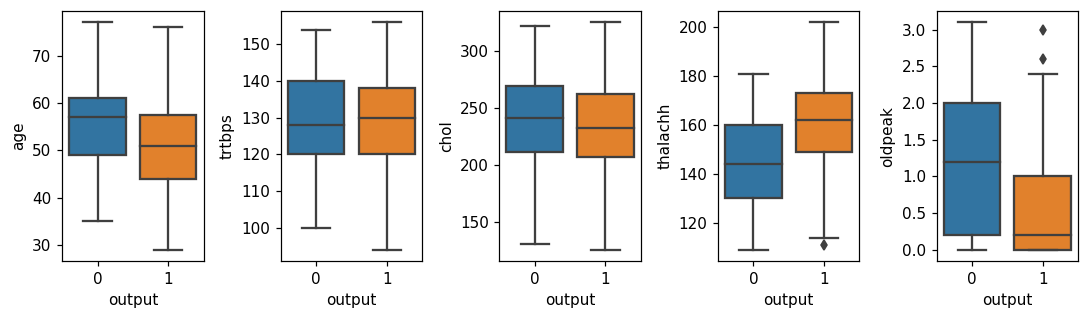

In [ ]:
# 범주형으로 되어 있는 컬럼에 대한 정상, 심장병의 관계 확인
fig, ax = plt.subplots(1, 5, figsize = (10, 3), dpi = 110)

for axis, num_var in zip(ax.ravel(), numberic_var):
  seaborn.boxplot(y = num_var, data = df, x = 'output', ax = axis)

plt.tight_layout()

데이터 분리하기

In [ ]:
# X(시험지), y(정답) 분리하기
X = df.iloc[:, :-1]  # : 행 모두 가져오고, :-1 열 뒤의 마지막 1줄 빼고 가져오기 df.iloc[0:13]
y = df['output']

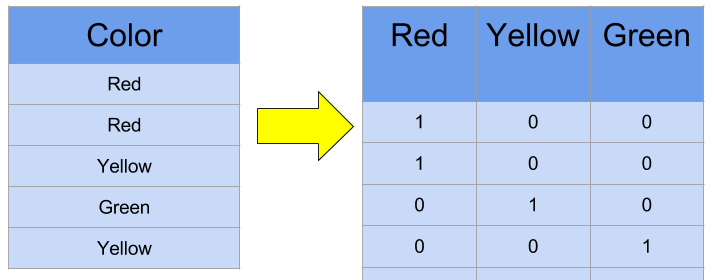

In [ ]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
# 자기 자신만 1을 가지는 것이 원-핫 인코딩
temp = pandas.get_dummies(X[categorical_var], drop_first = True)

In [ ]:
# 기존 데이터랑 합치기
X_modified = pandas.concat([X, temp], axis = 1)

In [ ]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis = 1, inplace = True)

In [ ]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


훈련용, 테스트 데이터 분리하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_modified, y,
                                                    train_size = 0.8,
                                                    random_state = 7)

차원 축소 -> 스케일링

In [ ]:
# 수치형 데이터 정규화

# 대부분 값이 0 ,1인데 나이(age)는 80이면 알아듣기 어려우니까 비슷한 값으로 바꿔주는 과정
scaler = StandardScaler()
X_train[numberic_var] = scaler.fit_transform(X_train[numberic_var])
X_test[numberic_var] = scaler.fit_transform(X_test[numberic_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
108,-0.348302,-0.550325,0.161526,0.440382,0.311244,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
12,-0.454602,0.177762,0.682239,0.888982,-0.240773,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
22,-1.198702,0.905848,-0.264511,1.237894,-0.903194,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
214,0.289498,-0.186282,0.279870,-0.456820,0.421647,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0
166,1.458798,-0.550325,-0.193504,-1.204487,1.967295,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1


머신러닝 모델 구축 - 1) LogisticRegression

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', log_reg.score(X_train, y_train))
print('Test data Score: ', log_reg.score(X_test, y_test))

Train data Score:  0.8723404255319149
Test data Score:  0.875


머신러닝 모델 구축 - 2) Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth = 5,         # tree의 최대 깊이= 가지가 뻗는 수 ex) 5이면 노드에서 가지가 5번 뻗음...max_depth=n   n이 적을 수록 단순한 모델  
                              min_samples_leaf = 20, #	min_samples_leaf - 노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용
                              min_samples_split = 40).fit(X_train, y_train) # min_samples_split - 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수

In [ ]:
# 정확도 확인
print('Train data Score: ', tree.score(X_train, y_train))
print('Test data Score: ', tree.score(X_test, y_test))

# 테스트 점수(test score)에 비해 훈련 점수(train score)가 과하게 높으면 과대적합 상태
# => 데이터를 더 구하거나, 모델 일반화 과정 등을 수행해야 함

Train data Score:  0.7712765957446809
Test data Score:  0.8958333333333334


머신러닝 모델 구축 - 3) GradientBoostingClassifier

In [ ]:
boost = GradientBoostingClassifier(max_depth = 3,
                                  learning_rate = 0.05).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ', boost.score(X_train, y_train))
print('Test data Score: ', boost.score(X_test, y_test))

Train data Score:  0.9787234042553191
Test data Score:  0.8958333333333334


성능평가 - ROC 커브

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

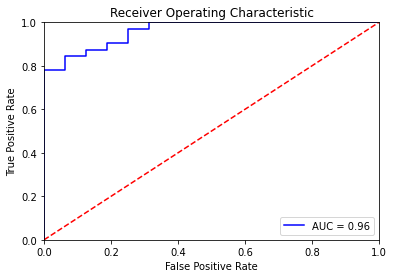

In [ ]:
# Logistic Regression
plot_auc_roc(log_reg)

# 파란선이 빨간 점선과 가까워지면 쓸모없는 모델일 확률이 높음

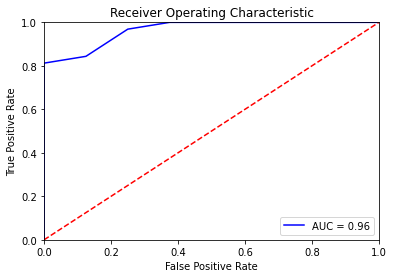

In [ ]:
# Decision Tree
plot_auc_roc(tree)

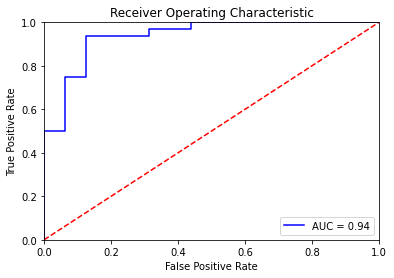

In [ ]:
# GradientBoostingClassifie
plot_auc_roc(boost)

모델 성능 평가

* <<Critical한 상황일 때는 주로 Recall의 수치를 확인>> ex) 심장병 오진
* <<단순한 상황일 때는 Precision의 수치를 확인>> ex) 스팸메일
* Precision : 예측한 모델 중 실제 사람이 있는 비율
* Recall :실제 중 모델이 심장병이라 예측한 사람
* Recall 낮을수록 오진단 (심장병인데 아니라는 진단을 낮추려면 Recall이 높아야 한다.)
* Recall을 중점으로 봐야함
* Recall이 제일 높은 모델을 선택해야 한다.
* 둘 다 중요하다면 f1 score를 확인한다.
* 정확도를 요구할 때는 Precision을 사용

In [ ]:
# Logistic Regression 평가 지표

# 1: 심장병 발병,    0: 심장병 X

lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.91      0.91      0.91        32

    accuracy                           0.88        48
   macro avg       0.86      0.86      0.86        48
weighted avg       0.88      0.88      0.88        48

accuracy 0.875
precision 0.90625
recall 0.90625
f1 0.90625


In [ ]:
# Decision Tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('Decision Tree 평가 지표')
print(tree_report)
print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )

Decision Tree 평가 지표
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.89      0.97      0.93        32

    accuracy                           0.90        48
   macro avg       0.90      0.86      0.88        48
weighted avg       0.90      0.90      0.89        48

accuracy 0.8958333333333334
precision 0.8857142857142857
recall 0.96875
f1 0.9253731343283582


In [ ]:
# GradientBoostingClassifie 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('GradientBoostingClassifie 평가 지표')
print(boost_report)
print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

GradientBoostingClassifie 평가 지표
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.91      0.94      0.92        32

    accuracy                           0.90        48
   macro avg       0.89      0.88      0.88        48
weighted avg       0.89      0.90      0.89        48

accuracy 0.8958333333333334
precision 0.9090909090909091
recall 0.9375
f1 0.923076923076923


In [ ]:
precision_list = [] # 추천 알고리즘의 경우 precision
recall_list = []    # 잘못 예측할 경우 critical한 경우 recall 높은 모델을 선택
                    # precision, recall 둘 다 중요할 경우엔 f1 높은 것으로 선택

precision_list.append(metrics.precision_score(y_test, lg_y_hat))
recall_list.append(metrics.recall_score(y_test, lg_y_hat))

precision_list.append(metrics.precision_score(y_test, tree_y_hat))
recall_list.append(metrics.recall_score(y_test, tree_y_hat))

precision_list.append(metrics.precision_score(y_test, boost_y_hat))
recall_list.append(metrics.recall_score(y_test, boost_y_hat))

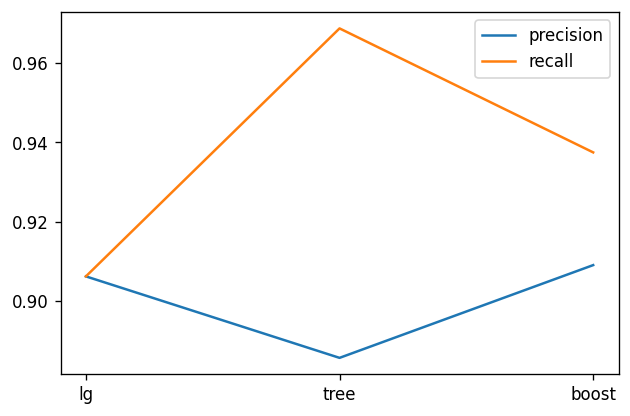

In [ ]:
plt.figure(dpi = 120)
plt.plot(['lg', 'tree', 'boost'], precision_list, label = 'precision')
plt.plot(['lg', 'tree', 'boost'], recall_list, label = 'recall')
plt.legend()
plt.show()